# Destinatik: Pre-processing Data

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import urllib.request
import os

# Data Wrangling:
### Data Gathering

In [2]:
# download the zipped dataset to the data directory
# package_url = "https://storage.googleapis.com/kagglesdsdata/datasets/1481754/2448367/package_tourism.csv"
# rating_url = "https://storage.googleapis.com/kagglesdsdata/datasets/1481754/2448367/tourism_rating.csv"
# tourId_url = "https://storage.googleapis.com/kagglesdsdata/datasets/1481754/2448367/tourism_with_id.csv"
# user_url = "https://storage.googleapis.com/kagglesdsdata/datasets/1481754/2448367/user.csv"

# download_dir = './datasets/'
# download_list = [package_url, rating_url, tourId_url, user_url]

# for data_url in download_list:
#     urllib.request.urlretrieve(data_url)

In [3]:
package_file = './datasets/package_tourism.csv'
rating_file = './datasets/tourism_rating.csv'
tourId_file = './datasets/tourism_with_id.csv'
user_file = './datasets/user.csv'

package_df = pd.read_csv(package_file)
rating_df = pd.read_csv(rating_file)
tourId_df = pd.read_csv(tourId_file)
user_df = pd.read_csv(user_file)

Dataset Link: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data

Use This code if you're using Google Colab.

In [4]:
# from google.colab import files
# uploaded = files.upload()

# package_gfile = 'package_tourism.csv'
# rating_gfile = 'tourism_rating.csv'
# tourId_gfile = 'tourism_with_id.csv'
# user_gfile = 'user.csv'

# package_df = pd.read_csv(package_gfile)
# rating_df = pd.read_csv(rating_gfile)
# tourId_df = pd.read_csv(tourId_gfile)
# user_df = pd.read_csv(user_gfile)

# Data Wrangling:
### Assessing Data

In [5]:
package_df.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


In [6]:
package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


Checking missing value in package_df

In [7]:
package_df.isna().sum()

Package            0
City               0
Place_Tourism1     0
Place_Tourism2     0
Place_Tourism3     0
Place_Tourism4    34
Place_Tourism5    61
dtype: int64

In [8]:
rating_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [9]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Checking missing value in rating_df

In [10]:
rating_df.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", rating_df.duplicated().sum())
rating_df.describe()

#duplicated file is okay, since it was rating (it can be used with median)

Jumlah duplikasi:  79


,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [12]:
tourId_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [13]:
tourId_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Checking missing value in tourId_df

In [14]:
tourId_df.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [15]:
print("Jumlah duplikasi: ", tourId_df.duplicated().sum())
tourId_df.describe()

Jumlah duplikasi:  0


,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


In [16]:
user_df.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [17]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Checking missing value in user_df

In [18]:
user_df.isna().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [19]:
print("Jumlah duplikasi: ", user_df.duplicated().sum())
user_df.describe()

Jumlah duplikasi:  0


,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


# Data Wrangling:
### Cleaning Data

Drop the column unnamed: 11 and 12 in tourId_df and Time_Minutes (unnecessary)

In [20]:
tourId_df = tourId_df.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes'])
tourId_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Price        437 non-null    int64  
 6   Rating       437 non-null    float64
 7   Coordinate   437 non-null    object 
 8   Lat          437 non-null    float64
 9   Long         437 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 34.3+ KB


# Exploratory Data Analysis (EDA)

Create a new dataframe to specify the Bandung City dataframe (bandung_df)

In [21]:
bandung_df = tourId_df[tourId_df['City']=='Bandung']
bandung_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
210,211,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781
211,212,Jalan Braga,Jalan Braga adalah nama sebuah jalan utama di ...,Budaya,Bandung,0,4.7,"{'lat': -6.9150534, 'lng': 107.6089842}",-6.915053,107.608984
212,213,Gedung Sate,"Gedung Sate, dengan ciri khasnya berupa orname...",Budaya,Bandung,5000,4.6,"{'lat': -6.9024812, 'lng': 107.61881}",-6.902481,107.618810
213,214,Trans Studio Bandung,Trans Studio Bandung adalah kawasan wisata ter...,Taman Hiburan,Bandung,280000,4.5,"{'lat': -6.9250943, 'lng': 107.6364944}",-6.925094,107.636494
214,215,Taman Hutan Raya Ir. H. Djuanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,15000,4.5,"{'lat': -6.8565791, 'lng': 107.6323734}",-6.856579,107.632373


Create a new dataframe to specify the Bandung City Place Rating dataframe (rateBDG_df)

In [23]:
rateBDG_df = rating_df[(rating_df['Place_Id'] >= 211) & (rating_df['Place_Id'] <= 334)]
rateBDG_df

,User_Id,Place_Id,Place_Ratings
5,1,312,2
6,1,258,5
17,1,292,3
18,1,222,3
22,1,246,4
...,...,...,...
9984,300,324,3
9986,300,323,1
9990,300,255,4
9997,300,311,3


Create a new dataframe to specify the Median of Bandung City Place Rating dataframe (rateBDGMed_df)

In [24]:
rateBDGMed_df = rateBDG_df.groupby(['Place_Id'])['Place_Ratings'].median().reset_index()
rateBDGMed_df

,Place_Id,Place_Ratings
0,211,3.0
1,212,3.0
2,213,3.0
3,214,3.5
4,215,3.0
...,...,...
119,330,3.0
120,331,3.0
121,332,4.0
122,333,4.0


# Visualization

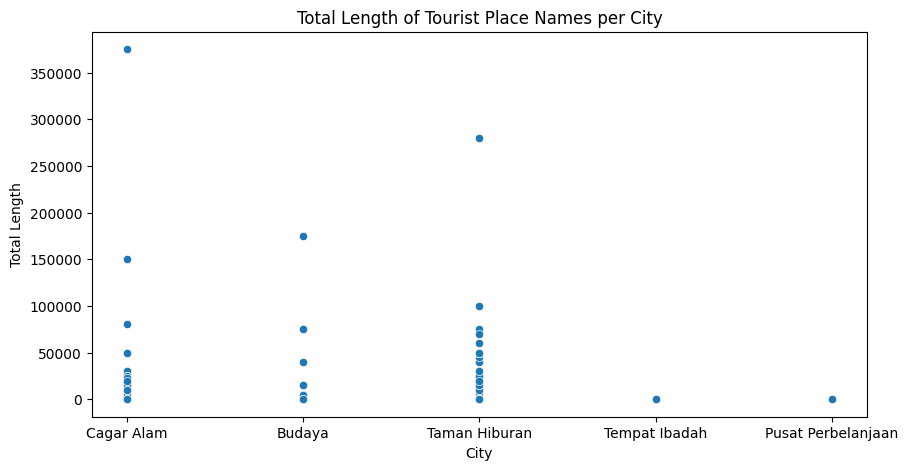

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
#plt.figure(figsize=(10, 6))


# Set the plot title and labels
#plt.title("Number of Tourist Places per Package")
#plt.xlabel("Number of Tourist Places")
#plt.ylabel("Count")

# Show the plot
#plt.show()

# Set the plot size
plt.figure(figsize=(10, 5))

# Create a box plot of the total length of tourist place names
sns.scatterplot(x="Category",y='Price', data=bandung_df)

# Set the plot title and labels
plt.title("Total Length of Tourist Place Names per City")
plt.xlabel("City")
plt.ylabel("Total Length")

# Show the plot
plt.show()